## 『本次練習內容』
#### 運用這幾天所學觀念搭建一個CNN分類器

## 『本次練習目的』
  #### 熟悉CNN分類器搭建步驟與原理
  #### 學員們可以嘗試不同搭法，如使用不同的Maxpooling層，用GlobalAveragePooling取代Flatten等等

In [2]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.datasets import cifar10
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from keras import regularizers

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data() # x是圖片,y是答案label

print(x_train.shape) #(50000, 32, 32, 3)

## Normalize Data
def normalize(X_train,X_test):
        mean = np.mean(X_train,axis=(0,1,2,3))
        std = np.std(X_train, axis=(0, 1, 2, 3))
        X_train = (X_train-mean)/(std+1e-7)
        X_test = (X_test-mean)/(std+1e-7) 
        return X_train, X_test,mean,std
    
    
## Normalize Training and Testset    
x_train, x_test,mean_train,std_train = normalize(x_train, x_test) 

(50000, 32, 32, 3)


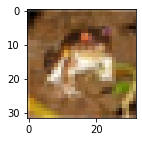

[6]


In [4]:
#Cifar-10 的所有圖片被分為 10 個類別 (以 0~9 數字作為 Label 之編碼) :
#0 : airplain (飛機)
#1 : automobile (汽車)
#2 : bird (鳥)
#3 : cat (貓)
#4 : deer (鹿)
#5 : dog (狗)
#6 : frog (青蛙)
#7 : horse (馬)
#8 : ship (船)
#9 : truck (卡車)
(x_train, y_train), (x_test, y_test) = cifar10.load_data() # x是圖片,y是答案label
import matplotlib.pyplot as plt

def plot_image(image):
    fig=plt.gcf()
    fig.set_size_inches(2, 2)                          
    plt.imshow(image, cmap='binary')
    plt.show()

plot_image(x_train[0])
print(y_train[0]) 

In [5]:
## OneHot Label 由(None, 1)-(None, 10)
## ex. label=2,變成[0,0,1,0,0,0,0,0,0,0]
one_hot=OneHotEncoder()
y_train=one_hot.fit_transform(y_train).toarray()
y_test=one_hot.transform(y_test).toarray()

In [6]:
classifier=Sequential()

#卷積組合
classifier.add(Convolution2D(32,(3,3),input_shape=(32,32,3),activation='relu'))
classifier.add(BatchNormalization())##BatchNormalization
classifier.add(MaxPooling2D(pool_size=(2,2)))

#卷積組合
classifier.add(Convolution2D(32,(3,3),activation='relu'))
classifier.add(BatchNormalization())##BatchNormalization
classifier.add(MaxPooling2D(pool_size=(2,2)))

#flatten
classifier.add(Flatten())

#FC
classifier.add(Dense(units=100,activation='relu',kernel_regularizer=regularizers.l2(l=0.001))) ##regularizers
classifier.add(BatchNormalization()) ##BatchNormalization
classifier.add(Dropout(rate=0.5)) ##Dropout

classifier.add(Dense(units=100,activation='relu',kernel_regularizer=regularizers.l2(0.001)))##regularizers
classifier.add(BatchNormalization()) ##BatchNormalization

classifier.add(Dropout(rate=0.3))##Dropout

classifier.add(Dense(units=10,activation='softmax'))
#超過兩個就要選categorical_crossentrophy
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
from keras.preprocessing.image import ImageDataGenerator ##Augmentation
img_gen = ImageDataGenerator( featurewise_center=True,featurewise_std_normalization=True,rotation_range=10,width_shift_range=0.1,
                                            height_shift_range=0.1,shear_range=0.1,zoom_range=0.1,horizontal_flip=True,vertical_flip=False,dtype=np.float32)
img_gen.fit(x_train)
from keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor='test_loss', patience=8, verbose=1) ##earlystop


Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/t

In [7]:
from __future__ import absolute_import, division, print_function, unicode_literals
import sys
import tensorflow as tf
print(sys.version)#3.7.3
print(tf.__version__)
print(tf.test.is_gpu_available())
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
tf.debugging.set_log_device_placement(True)

# Create some tensors
a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = tf.matmul(a, b)

print(c)

3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]
2.1.0
True
Num GPUs Available:  1
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [ ]:
##開始訓練
#classifier.fit_generator(img_gen.flow(x_train, y_train, batch_size=100) ,steps_per_epoch=500,
                               #epochs=5, validation_data = (x_test, y_test),callbacks = [earlystop])
classifier.fit_generator(img_gen.flow(x_train, y_train, batch_size=10) ,steps_per_epoch=100,
                               epochs=10, validation_data = (x_test, y_test))

Executing op Reshape in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 1/10
Executing op __inference_keras_scratch_graph_3980 in device /job:localhost/replica:0/task:0/device:GPU:0
100/100 [==============================] - 21s 214ms/step - loss: 3.1569 - accuracy: 0.1620 - val_loss: 73.1446 - val_accuracy: 0.0974
Epoch 2/10
  6/100 [>.............................] - ETA: 0s - loss: 2.6789 - accuracy: 0.2167

## 預測新圖片，輸入影像前處理要與訓練時相同
#### ((X-mean)/(std+1e-7) ):這裡的mean跟std是訓練集的
## 維度如下方示範

In [10]:
input_example=(np.zeros(shape=(1,32,32,3))-mean_train)/(std_train+1e-7) 
classifier.predict(input_example)

array([[0.01584783, 0.0048499 , 0.1375391 , 0.14775755, 0.4929391 ,
        0.03694186, 0.11243658, 0.00955019, 0.03807711, 0.0040608 ]],
      dtype=float32)